In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(df.info())
print(df.describe())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [3]:
df = df.drop_duplicates()
df['Age']= df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
columns= ['Survived','Pclass','Sex','Age','SibSp','Cabin']
df['Survived'] = df['Survived'].astype(bool)
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [4]:
def categorize_age(age):
    if age < 18:
        return 'Criança'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Idoso'



df['faixa_etaria'] = df['Age'].apply(categorize_age)
survivors = df[df['Survived'] == True]

print("👥 SOBREVIVENTES POR FAIXA ETÁRIA:")
print(survivors['faixa_etaria'].value_counts())

print("\n📋 PRIMEIROS SOBREVIVENTES:")
print(survivors.head())

👥 SOBREVIVENTES POR FAIXA ETÁRIA:
faixa_etaria
Adulto     274
Criança     61
Idoso        7
Name: count, dtype: int64

📋 PRIMEIROS SOBREVIVENTES:
   PassengerId  Survived  Pclass  \
1            2      True       1   
2            3      True       3   
3            4      True       1   
8            9      True       3   
9           10      True       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked faixa_etaria  
1      0          PC 17599  71.2833   C85        C       Adulto  
2      0  STON/O2. 3101282   7.9250   NaN 

In [5]:
gruped = df.groupby(['Pclass','Sex']).agg({
    'Survived':'mean',
    'Age': 'mean',
    'Fare': 'median'
}).reset_index()

print(gruped)

print(df.sort_values(by='Fare', ascending=False).head())


   Pclass     Sex  Survived        Age      Fare
0       1  female  0.968085  33.978723  82.66455
1       1    male  0.368852  38.995246  41.26250
2       2  female  0.921053  28.703947  22.00000
3       2    male  0.157407  30.512315  13.00000
4       3  female  0.500000  23.572917  12.47500
5       3    male  0.135447  26.911873   7.92500
     PassengerId  Survived  Pclass                                Name  \
737          738      True       1              Lesurer, Mr. Gustave J   
679          680      True       1  Cardeza, Mr. Thomas Drake Martinez   
258          259      True       1                    Ward, Miss. Anna   
438          439     False       1                   Fortune, Mr. Mark   
88            89      True       1          Fortune, Miss. Mabel Helen   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
737    male  35.0      0      0  PC 17755  512.3292         B101        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B

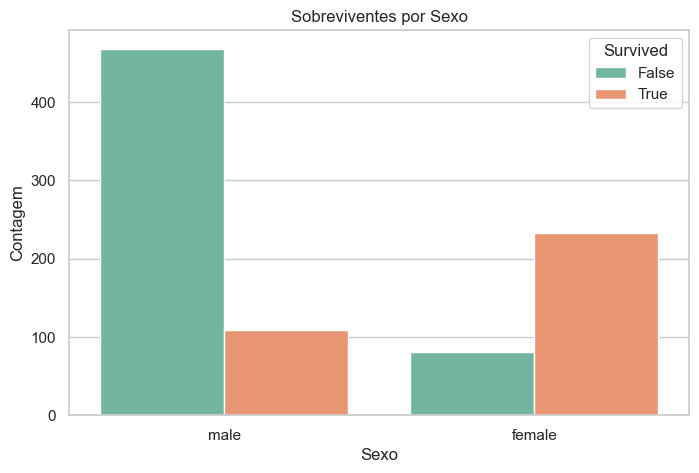

In [6]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()


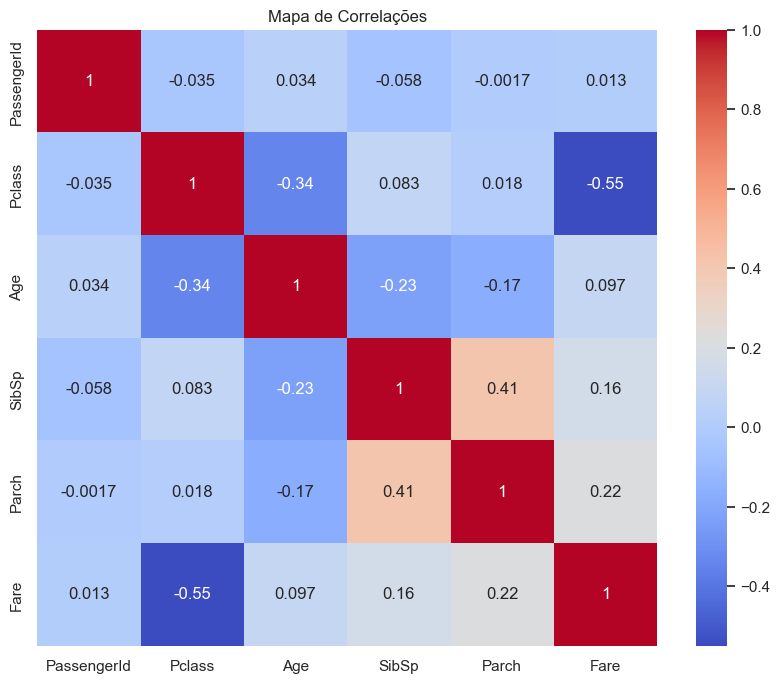

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlações')
plt.show()

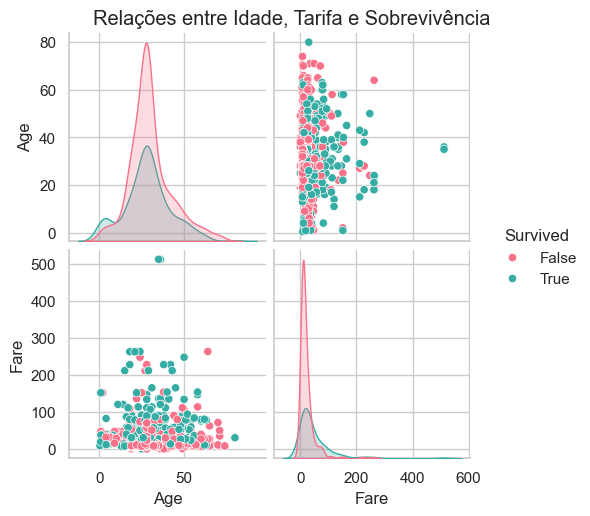

In [8]:


sns.pairplot(df, vars=['Age', 'Fare'], hue='Survived', palette='husl')

plt.suptitle('Relações entre Idade, Tarifa e Sobrevivência', y=1.02)
plt.show()
